In [23]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
plt.style.use('ggplot')

csv = Path.cwd() / "cv_results1.csv"



In [24]:
# Read the CSV file into a DataFrame
df = pd.read_csv(csv, usecols=['data.question', 'data.open_face', 'data.ratio_missing', 'f1'])

# Group by 'model_version', 'question', 'open_face', and 'classification_weight'
# grouped_df = df.groupby(['data.question', 'data.open_face',  'data.ratio_missing'])['f1'].mean()


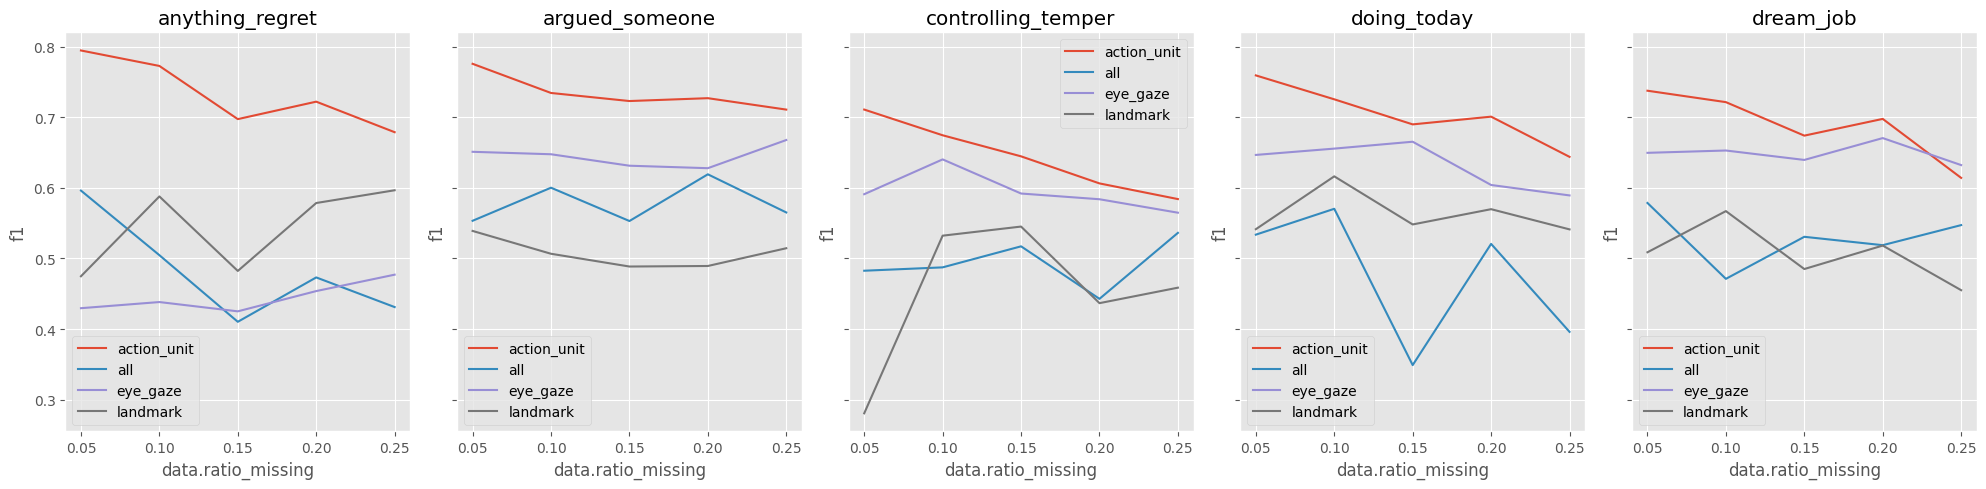

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
# Group by 'data.question', 'data.open_face', and 'data.ratio_missing'
grouped_df = df.groupby(['data.question', 'data.open_face', 'data.ratio_missing'])['f1'].mean().reset_index()

# Get the unique categories in 'data.question'
categories = grouped_df['data.question'].unique()

# Create a subplot with one row and five columns
fig, axes = plt.subplots(1, 5, figsize=(20, 5), sharey=True)

# Iterate over each question and create a plot in the corresponding subplot
for i, category in enumerate(categories):
    # Filter the data for the current category
    filtered_df = grouped_df[grouped_df['data.question'] == category]
    
    # Get the unique categories in 'data.open_face'
    open_face_categories = filtered_df['data.open_face'].unique()
    
    # Create a plot for each category in 'data.open_face' in the current subplot
    for open_face_category in open_face_categories:
        # Filter the data for the current 'data.open_face' category
        subset = filtered_df[filtered_df['data.open_face'] == open_face_category]
        
        # Plot the data in the current subplot
        axes[i].plot(subset['data.ratio_missing'], subset['f1'], label=open_face_category)
    
    # Set the plot title and labels for the current subplot
    axes[i].set_title(category)
    axes[i].set_xlabel('data.ratio_missing')
    axes[i].set_ylabel('f1')
    
    # Add a legend to the current subplot
    axes[i].legend()

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

In [29]:
from tabulate import tabulate

# Group by 'data.question', 'data.open_face', and 'data.ratio_missing'
grouped_df = df.groupby(['data.question', 'data.open_face', 'data.ratio_missing'])['f1'].mean().reset_index()

# Convert the grouped dataframe to a LaTeX table
latex_table = tabulate(grouped_df, headers='keys', tablefmt='latex', showindex=False)

# Print the LaTeX table
print(latex_table)

\begin{tabular}{llrr}
\hline
 data.question      & data.open\_face   &   data.ratio\_missing &       f1 \\
\hline
 anything\_regret    & action\_unit      &                 0.05 & 0.794525 \\
 anything\_regret    & action\_unit      &                 0.1  & 0.772619 \\
 anything\_regret    & action\_unit      &                 0.15 & 0.69732  \\
 anything\_regret    & action\_unit      &                 0.2  & 0.722043 \\
 anything\_regret    & action\_unit      &                 0.25 & 0.6788   \\
 anything\_regret    & all              &                 0.05 & 0.596111 \\
 anything\_regret    & all              &                 0.1  & 0.504651 \\
 anything\_regret    & all              &                 0.15 & 0.410294 \\
 anything\_regret    & all              &                 0.2  & 0.473148 \\
 anything\_regret    & all              &                 0.25 & 0.431145 \\
 anything\_regret    & eye\_gaze         &                 0.05 & 0.429572 \\
 anything\_regret    & eye\_gaze 

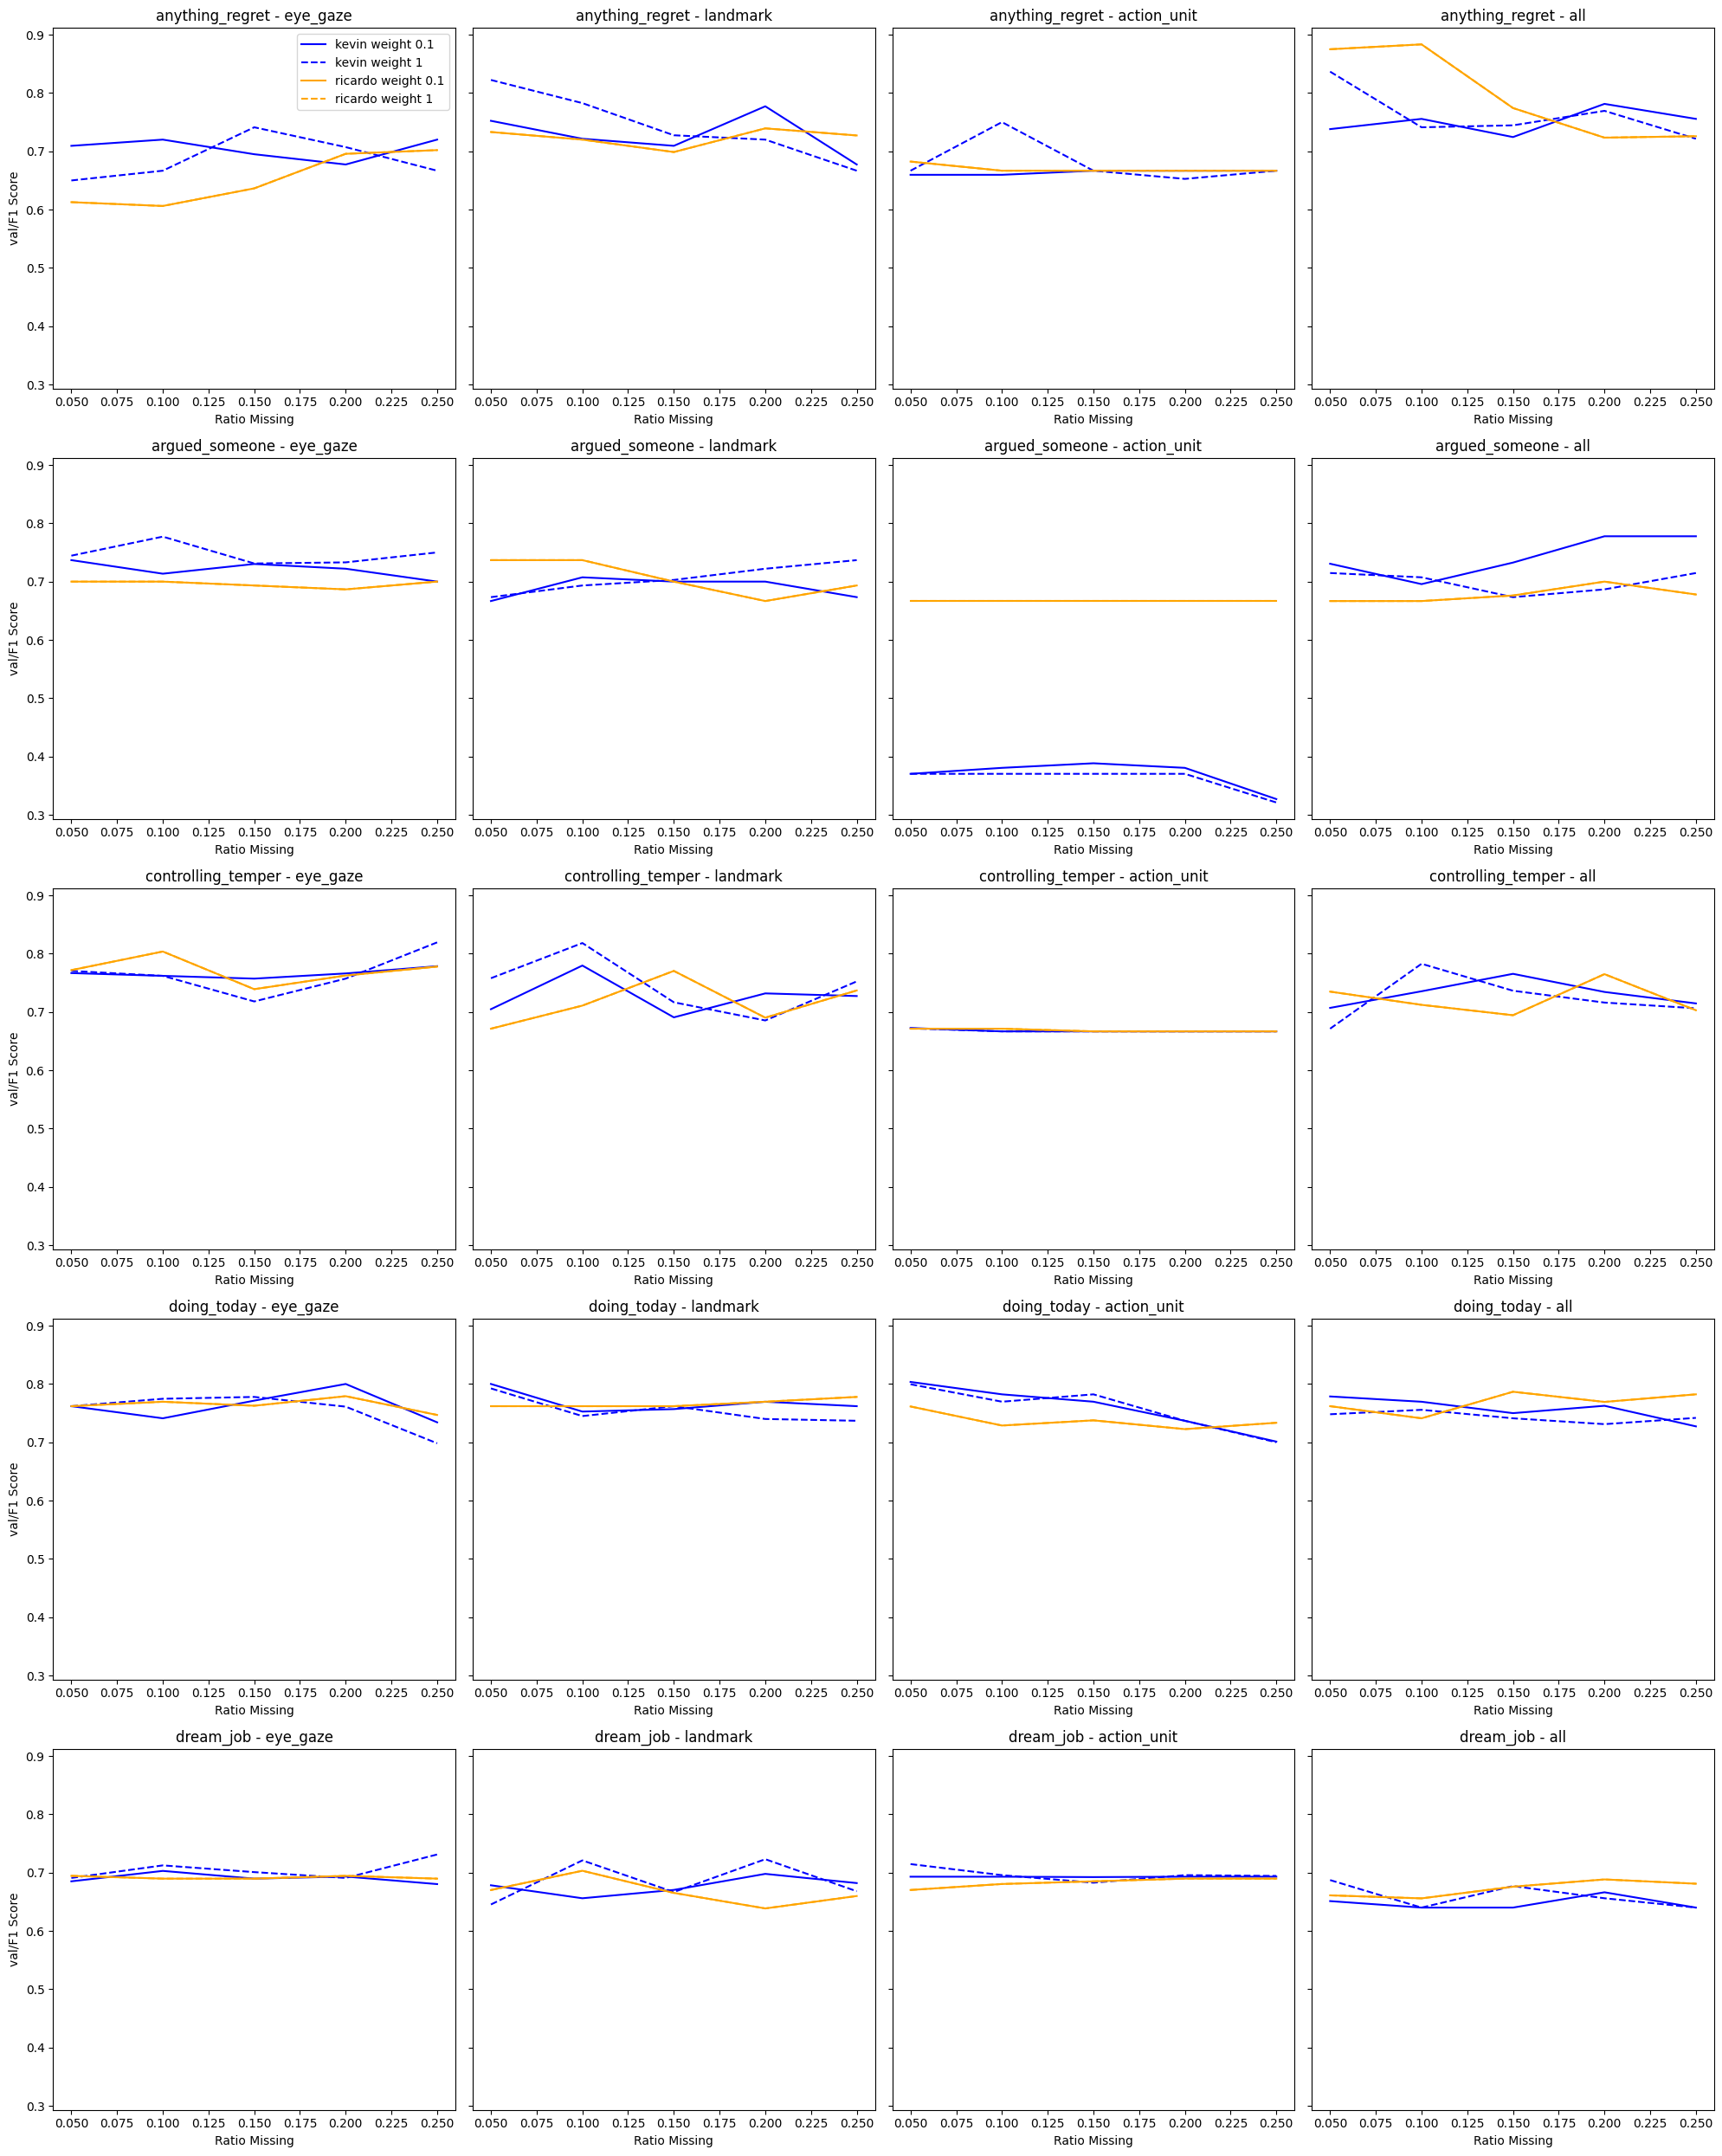

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
df = pd.read_csv('wandb_export_2024-12-05T10_03_44.923-05_00.csv')

# Group by 'model_version', 'question', 'open_face', 'classification_weight', and 'ratio_missing'
grouped_df = df.groupby(['model_version', 'question', 'open_face', 'classification_weight', 'ratio_missing'])['val/F1'].mean().reset_index()

# Define the open_face categories
open_face_categories = ['eye_gaze', 'landmark', 'action_unit', 'all']

# Get the unique questions
questions = grouped_df['question'].unique()

# Create a figure to hold all subplots
fig, axes = plt.subplots(len(questions), 4, figsize=(20, 5 * len(questions)), sharey=True)

# Define the line styles and colors
line_styles = ['-', '--']
colors = {'kevin': 'blue', 'ricardo': 'orange'}

# Loop through each question and create a 1x4 grid of subplots
for q_idx, question in enumerate(questions):
    # Filter the data for the current question
    filtered_df = grouped_df[grouped_df['question'] == question]
    
    # Plot the lines for each open_face category
    for i, open_face in enumerate(open_face_categories):
        ax = axes[q_idx, i]
        ax.set_title(f'{question} - {open_face}')
        ax.set_xlabel('Ratio Missing')
        if i == 0:
            ax.set_ylabel('val/F1 Score')
        
        for j, model_version in enumerate(['kevin', 'ricardo']):
            for k, classification_weight in enumerate([0.1, 1]):
                subset = filtered_df[(filtered_df['open_face'] == open_face) &
                                     (filtered_df['model_version'] == model_version) &
                                     (filtered_df['classification_weight'] == classification_weight)]
                linestyle = line_styles[k]
                color = colors[model_version]
                label = f'{model_version} weight {classification_weight}'
                ax.plot(subset['ratio_missing'], subset['val/F1'],
                        linestyle=linestyle, color=color, label=label)
        
        if q_idx == 0 and i == 0:  # Only add legend to the first subplot
            ax.legend()

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

In [3]:
import pandas as pd
from tabulate import tabulate

# Read the CSV file into a DataFrame
df = pd.read_csv('wandb_export_2024-12-05T10_03_44.923-05_00.csv')

# Group by 'model_version', 'question', 'open_face', 'classification_weight', and 'ratio_missing'
grouped_df = df.groupby(['model_version', 'question', 'open_face', 'classification_weight', 'ratio_missing'])['val/F1'].mean().reset_index()

# Pivot the table to get a summary
summary_df = grouped_df.pivot_table(index=['question', 'open_face', 'classification_weight'],
                                    columns='model_version',
                                    values='val/F1',
                                    aggfunc='mean').reset_index()

# Convert the summary DataFrame to a LaTeX table
latex_table = tabulate(grouped_df, headers='keys', tablefmt='latex', showindex=False)

# Print the LaTeX table
print(latex_table)

\begin{tabular}{lllrrr}
\hline
 model\_version   & question           & open\_face   &   classification\_weight &   ratio\_missing &   val/F1 \\
\hline
 kevin           & anything\_regret    & action\_unit &                     0.1 &            0.05 & 0.659649 \\
 kevin           & anything\_regret    & action\_unit &                     0.1 &            0.1  & 0.659649 \\
 kevin           & anything\_regret    & action\_unit &                     0.1 &            0.15 & 0.666667 \\
 kevin           & anything\_regret    & action\_unit &                     0.1 &            0.2  & 0.666667 \\
 kevin           & anything\_regret    & action\_unit &                     0.1 &            0.25 & 0.666667 \\
 kevin           & anything\_regret    & action\_unit &                     1   &            0.05 & 0.666667 \\
 kevin           & anything\_regret    & action\_unit &                     1   &            0.1  & 0.75     \\
 kevin           & anything\_regret    & action\_unit &         

In [2]:
summary_df

model_version,question,open_face,classification_weight,kevin,ricardo
0,anything_regret,action_unit,0.1,0.663860,0.669804
1,anything_regret,action_unit,1.0,0.680526,0.669804
2,anything_regret,all,0.1,0.750952,0.796335
3,anything_regret,all,1.0,0.762602,0.796335
4,anything_regret,eye_gaze,0.1,0.704318,0.650571
5,anything_regret,eye_gaze,1.0,0.686309,0.650571
6,anything_regret,landmark,0.1,0.727503,0.723620
7,anything_regret,landmark,1.0,0.743814,0.723620
8,argued_someone,action_unit,0.1,0.369356,0.666667
9,argued_someone,action_unit,1.0,0.360464,0.666667
